# Covid19 Data Analysis
------------------------------------------

### Let's start with importing the modules 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

##### Lets start with importing covid19 dataset


In [2]:
df_conf = pd.read_csv("Covid19_Confirmed_dataset.csv")

#### Let's check the characteristics of the dataframe

In [3]:
df_conf.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [4]:
df_conf.shape

(266, 104)

##### Dropping Latitude and longitude columns

In [5]:
df=df_conf.drop(["Lat","Long"],axis=1)

##### Aggregate the data points for countrywise analysis

In [6]:
df = df.groupby(by="Country/Region").sum()

In [7]:
df.shape

(187, 100)

In [8]:
df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


##### Check some country wise visuals

[]

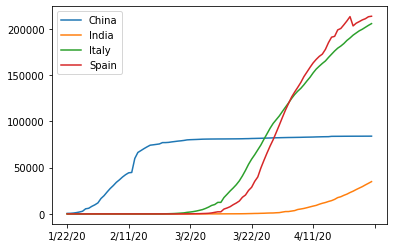

In [9]:
df.loc["China"].plot()
df.loc["India"].plot()
df.loc["Italy"].plot()
df.loc["Spain"].plot()
plt.legend()
plt.plot()

##### Select a better measure for our analysis
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

<AxesSubplot:>

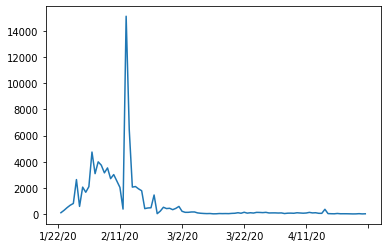

In [10]:
df.loc["China"].diff().plot()

first derivative maximum of the curve seems to be a better measure

##### find maxmimum infection rate for countries

In [11]:
max_inf = []
countries = list(df.index)
for c in countries:
    max_inf.append(df.loc[c].diff().max())

In [12]:
df["max_infention_rate"]= max_inf

In [13]:
df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infention_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


##### Making a new dataframe for infection rate

In [14]:
df_infection = pd.DataFrame(np.log(df["max_infention_rate"]))

In [15]:
df_infection.rename(columns={"max_infention_rate":"infection_rate"},inplace=True)

In [16]:
df_infection.head()

,infection_rate
Country/Region,
Afghanistan,5.446737
Albania,3.526361
Algeria,5.293305
Andorra,3.761200
Angola,1.609438


##### Now, lets work on happiness index dataset


##### importing the dataset

In [17]:
df_happy = pd.read_csv("worldwide_happiness_report.csv")

In [18]:
df_happy.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


##### let's drop the useless columns 

In [19]:
useless_cols=["Overall rank","Score","Generosity","Perceptions of corruption"]

In [20]:
df_happy.drop(useless_cols,axis=1,inplace=True)

In [21]:
df_happy.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


##### changing the indices of the dataframe to match the infection dataferame

In [22]:
df_happy.set_index("Country or region",inplace=True)

##### now, its time to join two dataset we have prepared  

####  Datasets :

In [23]:
df_infection.shape

(187, 1)

In [24]:
df_happy.shape

(156, 4)

In [25]:
data = df_infection.join(df_happy,how="inner")

### Lets do some basic sanity checks for our data

In [26]:
data.head()

,infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,5.446737,0.350,0.517,0.361,0.000
Albania,3.526361,0.947,0.848,0.874,0.383
Algeria,5.293305,1.002,1.160,0.785,0.086
Argentina,5.673323,1.092,1.432,0.881,0.471
Armenia,4.897840,0.850,1.055,0.815,0.283


In [27]:
data.shape

(143, 5)

In [28]:
data.describe()

,infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
count,143.000000,143.000000,143.000000,143.000000,143.000000
mean,4.909369,0.892392,1.201986,0.728902,0.393748
std,2.127686,0.401240,0.306334,0.230101,0.146585
min,0.000000,0.000000,0.000000,0.105000,0.000000
25%,3.433987,0.576000,1.036000,0.544500,0.300500
50%,4.672829,0.960000,1.274000,0.789000,0.418000
75%,6.273720,1.203500,1.447000,0.877500,0.508000
max,10.197984,1.684000,1.624000,1.141000,0.631000


In [29]:
data.isna().sum()

infection_rate                  0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
dtype: int64

In [30]:
data.duplicated().sum()

0

### So, the data now looks ready for analysis

##### Lets start with correlation matrix 

In [31]:
round(data.corr(),2)

,infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
infection_rate,1.00,0.59,0.41,0.55,0.26
GDP per capita,0.59,1.00,0.76,0.86,0.39
Social support,0.41,0.76,1.00,0.77,0.46
Healthy life expectancy,0.55,0.86,0.77,1.00,0.43
Freedom to make life choices,0.26,0.39,0.46,0.43,1.00


##### Lets check pairwise correlation for all the columns5

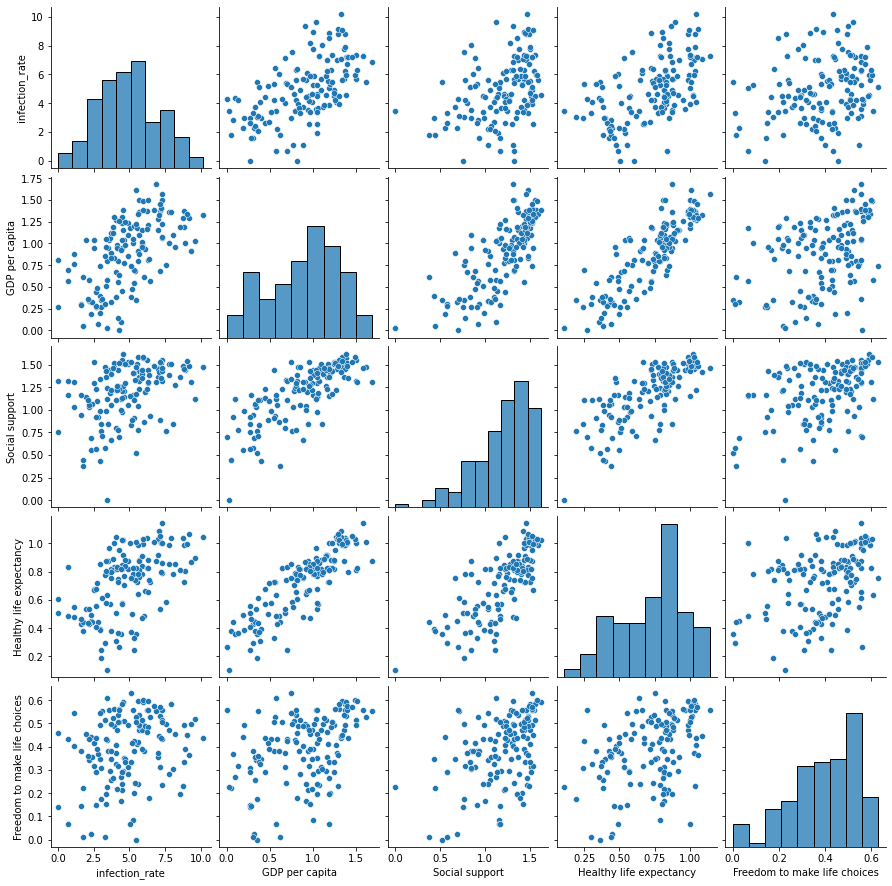

In [32]:
sns.pairplot(data)

##### visualization of the correlation matrix results using heatmap


<AxesSubplot:>

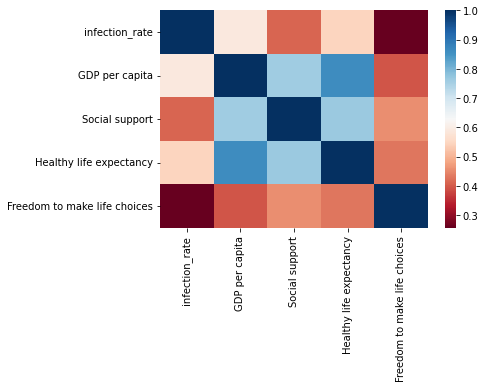

In [33]:
sns.heatmap(data.corr(),cmap="RdBu")

##### Okay, thats lot of correlations, lets analyse one at a time

##### Plotting GDP vs maximum Infection rate

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='infection_rate'>

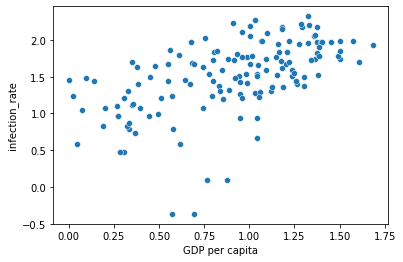

In [34]:
sns.scatterplot(data["GDP per capita"],np.log(data["infection_rate"]))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='infection_rate'>

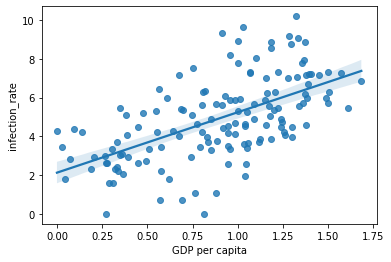

In [35]:
sns.regplot(data["GDP per capita"],data["infection_rate"])


##### Plotting Social support vs maximum Infection rate

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='infection_rate'>

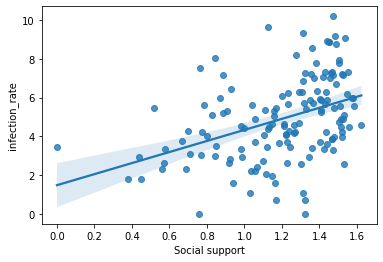

In [36]:
sns.regplot(data["Social support"],data["infection_rate"])

##### Plotting Healthy life expectancy vs maximum Infection rate

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='infection_rate'>

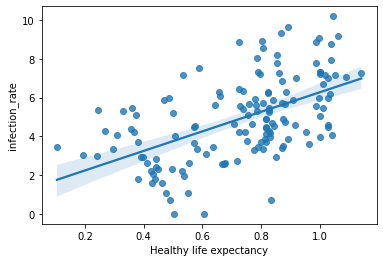

In [37]:
sns.regplot(data["Healthy life expectancy"],data["infection_rate"])

##### Plotting Freedom to make life choices vs maximum Infection rate

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='infection_rate'>

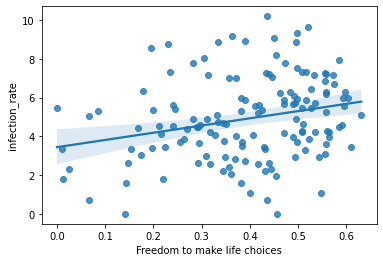

In [38]:
sns.regplot(data["Freedom to make life choices"],data["infection_rate"])

## We see in the results that, developed countries are prone to corona cases than underdeveloped or undeveloped countried


### By developed countries, I mean countries with better index in GDP, Freedom, Life Expectancy and Social support

### However, this dataset contains 3 months worth of data, hence variation in trends are highly probable.